In [9]:
import skimage, numpy as np, numpy.ma as ma, scipy.ndimage
from matplotlib import pyplot as plt

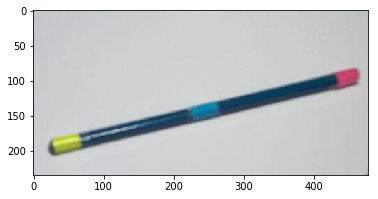

In [35]:
markerpic = plt.imread("rendered_markers/2.jpg")
# markerpic = markerpic[:,:,0:3]
plt.figure("marker")
plt.imshow(markerpic)

[0.9474182704639122, 0.5658836374147063, 0.18607103734838426]


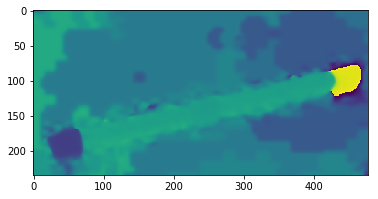

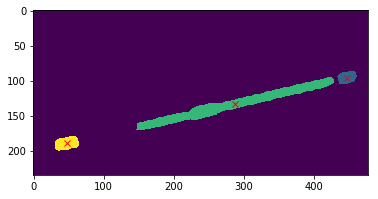

In [37]:
smoothpic = skimage.filters.gaussian(markerpic, sigma=3, multichannel=True)
hsvmarker = skimage.color.rgb2hsv(smoothpic)
plt.figure("H")
plt.imshow(hsvmarker[:,:,0])
plt.figure("S")
labeledpic, nlabels = skimage.measure.label(hsvmarker[:,:,1] >= 0.5, connectivity=1, return_num=True, background=0)
plt.imshow(labeledpic)
def masked_mean(pic, mask):
    maskedpic = ma.masked_array(pic, mask)
    return np.mean(maskedpic)
label_avg_hues = [masked_mean(hsvmarker[:,:,0], labeledpic != label) for label in range(1, nlabels+1)]
label_cms = [scipy.ndimage.center_of_mass(labeledpic == label) for label in range(1, nlabels+1)]
print(label_avg_hues)
for y, x in label_cms:
    plt.plot(x, y, 'rx')